In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dtale
#pip pip install --upgrade dtale

In [6]:
data = pd.read_csv('cleanerstill.csv', sep=";")

/home/ronsholt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
d = dtale.show(data)

In [9]:
d.kill()

Executing shutdown...


2020-02-27 10:59:23,706 - INFO     - Executing shutdown...


In [122]:
new_data["sex"].value_counts()

m    32311
f    21638
Name: sex, dtype: int64

In [167]:
new_data["location"].value_counts()

san francisco  california              27981
oakland  california                     6457
berkeley  california                    3745
san mateo  california                   1204
palo alto  california                    961
alameda  california                      811
hayward  california                      679
san rafael  california                   669
emeryville  california                   666
redwood city  california                 627
daly city  california                    621
san leandro  california                  595
walnut creek  california                 577
vallejo  california                      506
menlo park  california                   417
richmond  california                     382
south san francisco  california          381
mountain view  california                344
novato  california                       336
burlingame  california                   325
castro valley  california                312
pleasant hill  california                312
stanford  

## Visualization of classes distribution

### Gender distribution

In [66]:
data["sex"].value_counts()

m    35826
f    24117
Name: sex, dtype: int64

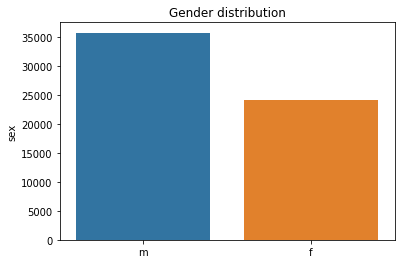

In [59]:
gender_dist = sns.barplot(x=data.sex.value_counts().index, y=data.sex.value_counts())
plt.title("Gender distribution")

plt.show();

### Status distribution

In [62]:
data["status"].value_counts()

single            55695
seeing someone     2064
available          1864
married             310
unknown              10
Name: status, dtype: int64

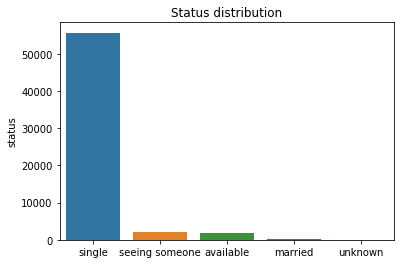

In [58]:
status_dist = sns.barplot(x=data.status.value_counts().index, y=data.status.value_counts())
plt.title("Status distribution")


plt.show();

### Diet distribution

In [61]:
data["diet"].value_counts()[:19]

                       24395
mostly anything        16583
anything                6183
strictly anything       5113
mostly vegetarian       3444
mostly other            1007
strictly vegetarian      875
vegetarian               667
strictly other           452
mostly vegan             338
other                    331
strictly vegan           228
vegan                    136
mostly kosher             86
mostly halal              48
strictly halal            18
strictly kosher           18
kosher                    11
halal                     11
Name: diet, dtype: int64

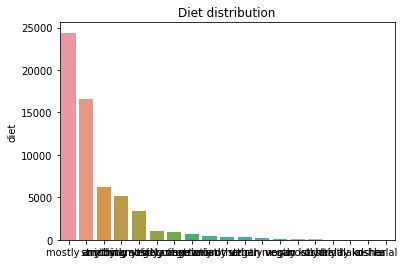

In [57]:
diet_dist = sns.barplot(x=data.diet.value_counts().index[:19], y=data.diet.value_counts()[:19])

#design
plt.title("Diet distribution")
#diet_dist.set_xticklabels(diet_dist.get_xticklabels(), rotation=30)

plt.show();

### Education distribution

In [65]:
data["education"].value_counts()

graduated from college university    23959
graduated from masters program        8960
                                      6628
working on college university         5712
working on masters program            1683
graduated from two year college       1531
graduated from high school            1428
graduated from ph d program           1272
graduated from law school             1122
working on two year college           1074
dropped out of college university      994
working on ph d program                983
college university                     801
graduated from space camp              657
dropped out of space camp              523
graduated from med school              446
working on space camp                  445
working on law school                  269
two year college                       222
working on med school                  212
dropped out of two year college        191
dropped out of masters program         140
masters program                        136
dropped out

### Job distribution

In [63]:
data["job"].value_counts()

                                     8198
other                                7588
student                              4882
science   tech   engineering         4848
computer   hardware   software       4709
artistic   musical   writer          4439
sales   marketing   biz dev          4391
medicine   health                    3679
education   academia                 3513
executive   management               2373
banking   financial   real estate    2266
entertainment   media                2250
law   legal services                 1381
hospitality   travel                 1364
construction   craftsmanship         1021
clerical   administrative             805
political   government                707
rather not say                        436
transportation                        366
unemployed                            273
retired                               250
military                              204
m                                       1
Name: job, dtype: int64

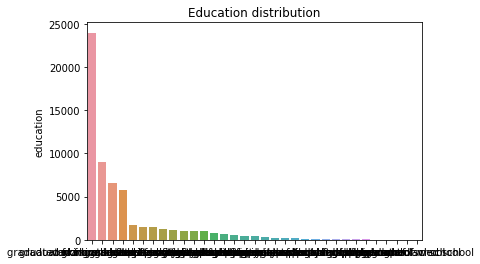

In [83]:
edu_dist = sns.barplot(x=data.education.value_counts().index, y=data.education.value_counts())
plt.title("Education distribution");

### Drugs distribution

In [73]:
data["drugs"].value_counts()

never        37722
             14080
sometimes     7732
often          410
white            1
Name: drugs, dtype: int64

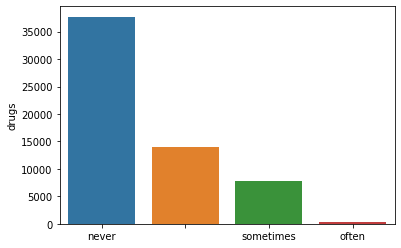

In [79]:
drugs_dist = sns.barplot(x=data.drugs.value_counts().index, y=data.drugs.value_counts())

### Orientation distribution

In [71]:
data["orientation"].value_counts()

straight    51604
gay          5573
bisexual     2767
Name: orientation, dtype: int64

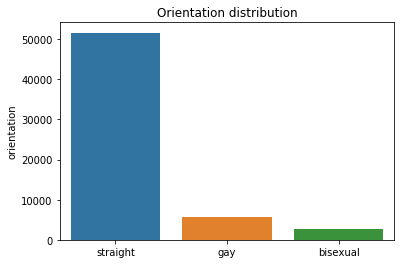

In [78]:
orientation_dist = sns.barplot(x=data.orientation.value_counts().index, y=data.orientation.value_counts())
plt.title("Orientation distribution");

### Drinks distribution

In [77]:
data["drinks"].value_counts()

socially       41779
rarely          5956
often           5164
not at all      3267
                2985
very often       471
desperately      322
Name: drinks, dtype: int64

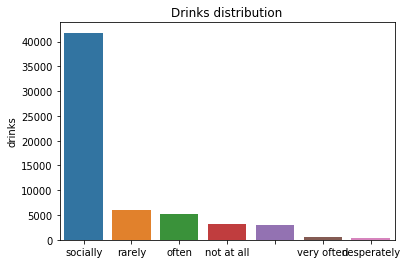

In [85]:
drinks_dist = sns.barplot(x=data.drinks.value_counts().index, y=data.drinks.value_counts())
plt.title("Drinks distribution");

### Smokes distribution

In [87]:
data["smokes"].value_counts()

no                43893
                   5512
sometimes          3787
when drinking      3040
yes                2231
trying to quit     1480
Name: smokes, dtype: int64

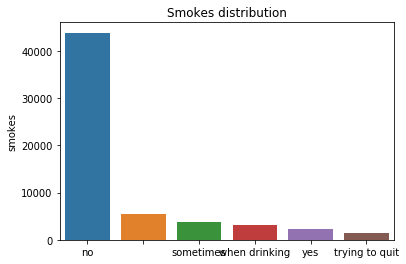

In [86]:
smokes_dist = sns.barplot(x=data.smokes.value_counts().index, y=data.smokes.value_counts())
plt.title("Smokes distribution");

### Age distribution

In [131]:
b_30_data = 0
a_30_data = 0
for age in data["age"]:
    if len(age) > 4:
        continue
    elif int(age) <= 30:
        b_30 += 1
    else:
        a_30 += 1

In [132]:
print(b_30_data)
print(a_30_data)

0
0


In [162]:
b_28 = 0
b_28_38 = 0
a_38 = 0
for age in new_data["age"]:
    if len(age) > 4:
        continue
    elif int(age) <= 26:
        b_28 += 1
    elif 26 < int(age) <= 36:
        b_28_38 += 1
    else:
        a_38 += 1

In [163]:
print(b_28)
print(b_28_38)
print(a_38)

16241
23850
13859


In [127]:
age_group = ["Below 30", "Above 30"]
age_group_count = [b_30, a_30]

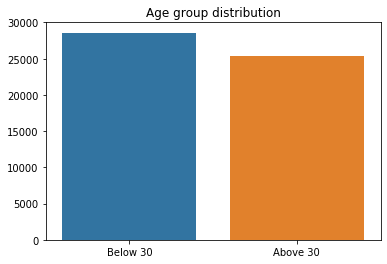

In [128]:
age_dist = sns.barplot(x=age_group, y=age_group_count)
plt.title("Age group distribution");

In [108]:
sex_m_recall = [0.420, 0.592, 0.815]
sex_m_precision = [0.514, 0.508, 0.504]
sex_f_recall = [0.607, 0.420, 0.186]
sex_f_precision = [0.513, 0.504, 0.497]